<a href="https://colab.research.google.com/github/ALIFRASHEED123/MACHINE-LEARNING/blob/main/PROJECT_CUSTOMER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

IMPORTING THE FILE

In [ ]:
TCC=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

READING THE FILE

CHECKING THE SHAPE OF DATA

In [ ]:
TCC.shape

(7043, 21)

In [ ]:
TCC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
TCC.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
TCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
TCC.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


CHECKING THE NULL VALUE

In [ ]:
TCC.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
TCC.fillna(method='ffill',axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [ ]:
TCC.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

DISTPLOT

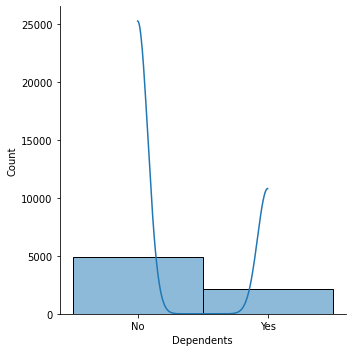

In [ ]:
sns.displot(x="Dependents",data=TCC,bins=20,kde=True)

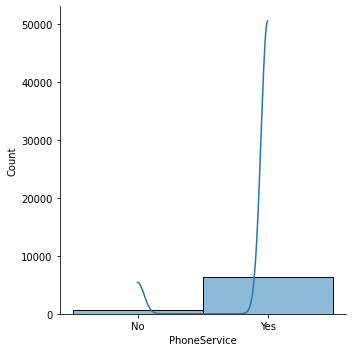

In [ ]:
sns.displot(x="PhoneService",data=TCC,bins=20,kde=True)

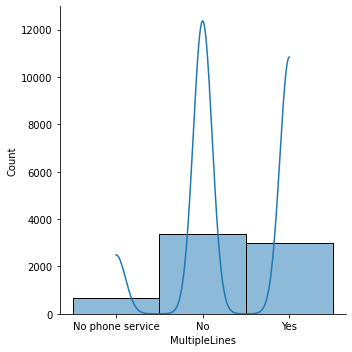

In [ ]:
sns.displot(x="MultipleLines",data=TCC,bins=20,kde=True)

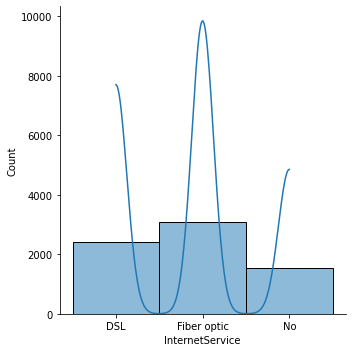

In [ ]:
sns.displot(x="InternetService",data=TCC,bins=20,kde=True)

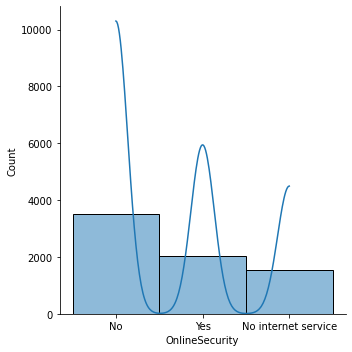

In [ ]:
sns.displot(x="OnlineSecurity",data=TCC,bins=20,kde=True)

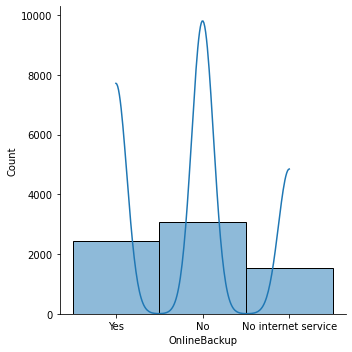

In [ ]:
sns.displot(x="OnlineBackup",data=TCC,bins=20,kde=True)

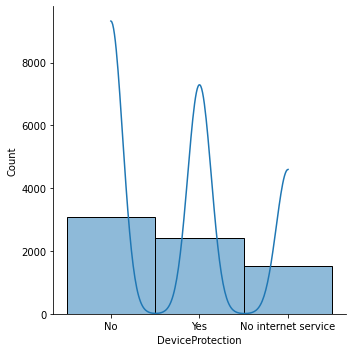

In [ ]:
sns.displot(x="DeviceProtection",data=TCC,bins=20,kde=True)

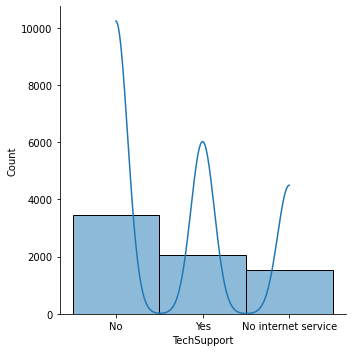

In [ ]:
sns.displot(x="TechSupport",data=TCC,bins=20,kde=True)

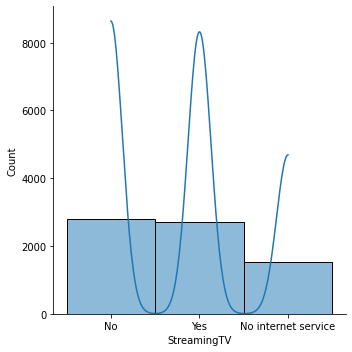

In [ ]:
sns.displot(x="StreamingTV",data=TCC,bins=20,kde=True)

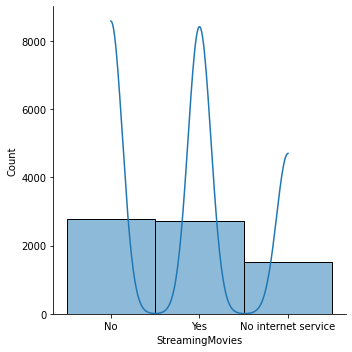

In [ ]:
sns.displot(x="StreamingMovies",data=TCC,bins=20,kde=True)

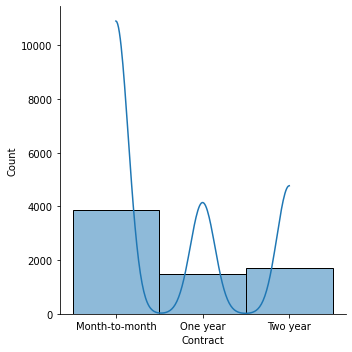

In [ ]:
sns.displot(x="Contract",data=TCC,bins=20,kde=True)

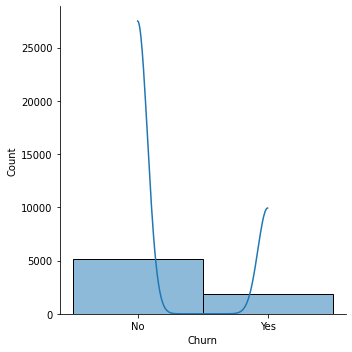

In [ ]:
sns.displot(x="Churn",data=TCC,bins=20,kde=True)

[ENCODING THE DATA(converting categorical values into numerical)

In [ ]:
encoder=LabelEncoder()

In [ ]:
TCC['customerID']=encoder.fit_transform(TCC['customerID'])
TCC['gender']=encoder.fit_transform(TCC['gender'])
TCC['Partner']=encoder.fit_transform(TCC['Partner'])
TCC['Dependents']=encoder.fit_transform(TCC['Dependents'])
TCC['PhoneService']=encoder.fit_transform(TCC['PhoneService'])
TCC['MultipleLines']=encoder.fit_transform(TCC['MultipleLines'])
TCC['InternetService']=encoder.fit_transform(TCC['InternetService'])
TCC['OnlineSecurity']=encoder.fit_transform(TCC['OnlineSecurity'])
TCC['OnlineBackup']=encoder.fit_transform(TCC['OnlineBackup'])
TCC['DeviceProtection']=encoder.fit_transform(TCC['DeviceProtection'])
TCC['TechSupport']=encoder.fit_transform(TCC['TechSupport'])
TCC['StreamingTV']=encoder.fit_transform(TCC['StreamingTV'])
TCC['StreamingMovies']=encoder.fit_transform(TCC['StreamingMovies'])
TCC['Contract']=encoder.fit_transform(TCC['Contract'])
TCC['PaperlessBilling']=encoder.fit_transform(TCC['PaperlessBilling'])
TCC['PaymentMethod']=encoder.fit_transform(TCC['PaymentMethod'])
TCC['MonthlyCharges']=encoder.fit_transform(TCC['MonthlyCharges'])
TCC['TotalCharges']=encoder.fit_transform(TCC['TotalCharges'])

REPLACING THE COLUMN

In [ ]:
TCC.replace({'Churn':{'Yes':1,'No':0}},inplace=True)

In [ ]:
print(TCC)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

CHECKING THE OUTLIERS

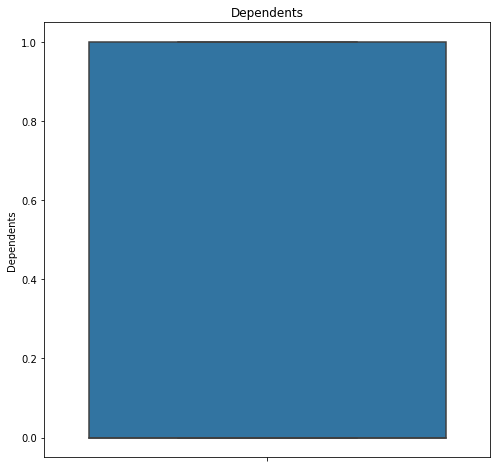

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Dependents',data=TCC)
plt.title('Dependents')
plt.show()

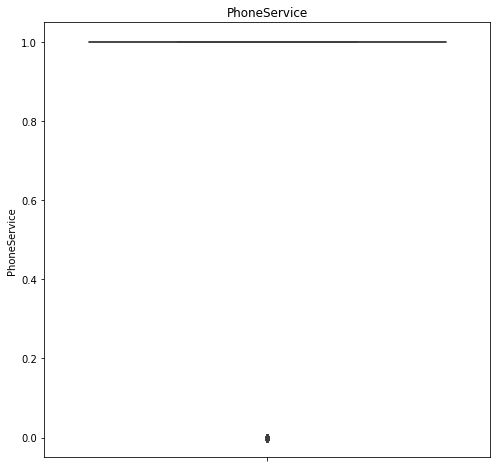

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='PhoneService',data=TCC)
plt.title('PhoneService')
plt.show()

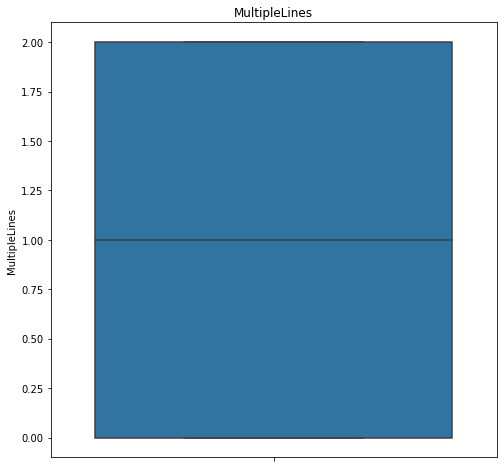

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='MultipleLines',data=TCC)
plt.title('MultipleLines')
plt.show()

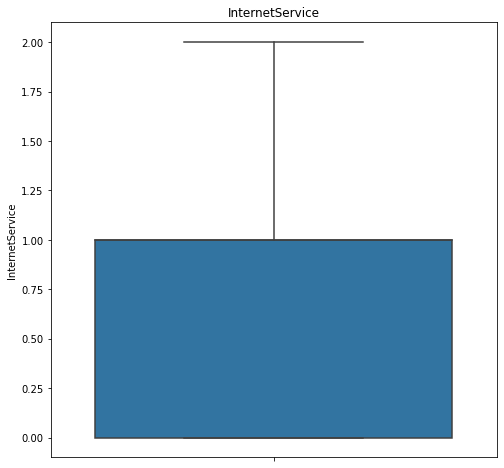

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='InternetService',data=TCC)
plt.title('InternetService')
plt.show()

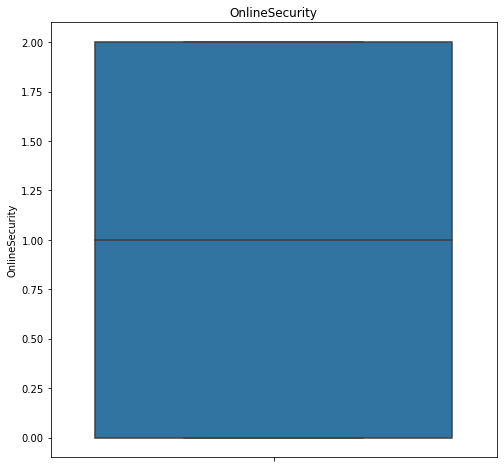

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='OnlineSecurity',data=TCC)
plt.title('OnlineSecurity')
plt.show()

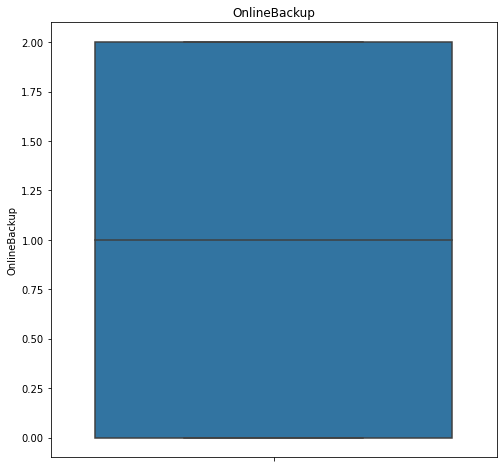

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='OnlineBackup',data=TCC)
plt.title('OnlineBackup')
plt.show()

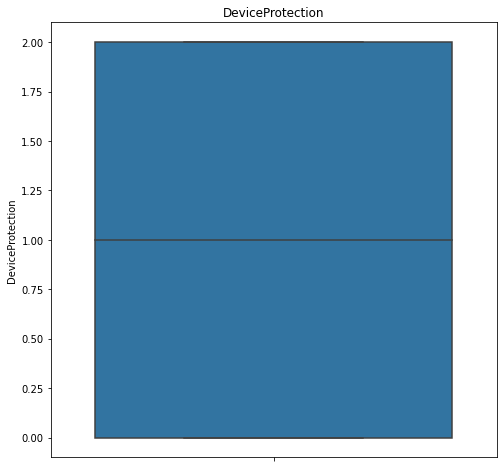

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='DeviceProtection',data=TCC)
plt.title('DeviceProtection')
plt.show()

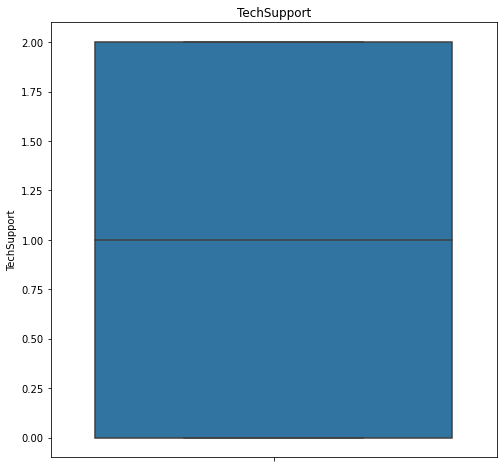

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='TechSupport',data=TCC)
plt.title('TechSupport')
plt.show()

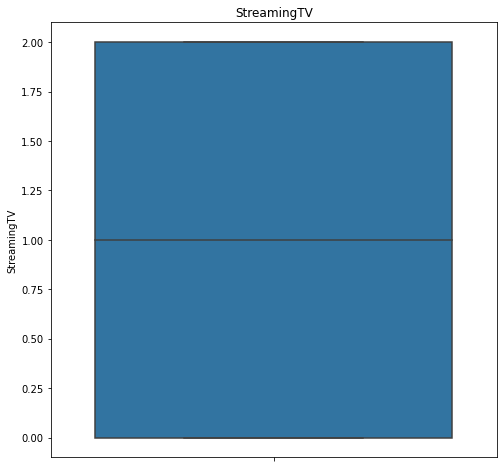

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='StreamingTV',data=TCC)
plt.title('StreamingTV')
plt.show()

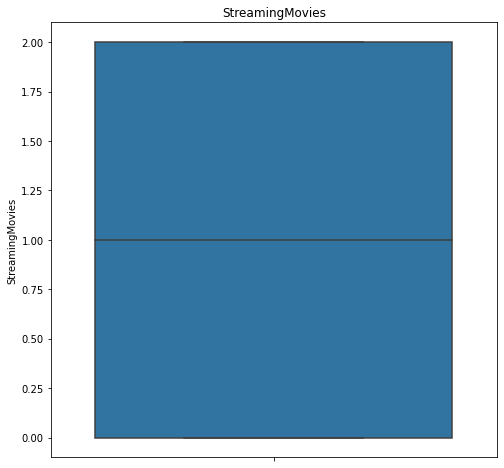

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='StreamingMovies',data=TCC)
plt.title('StreamingMovies')
plt.show()

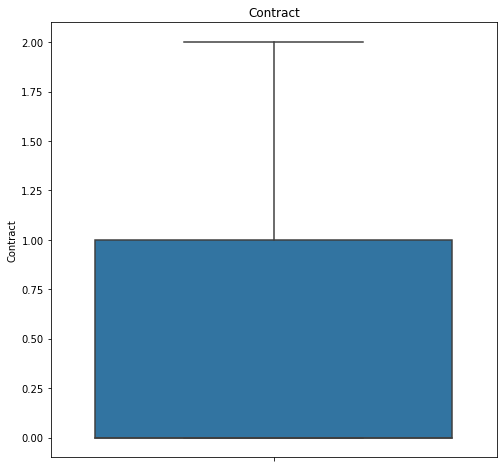

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Contract',data=TCC)
plt.title('Contract')
plt.show()

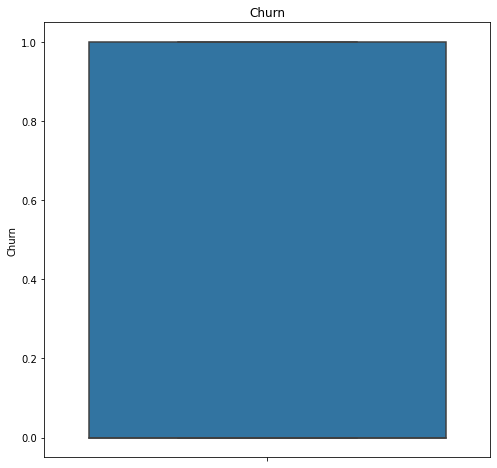

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Churn',data=TCC)
plt.title('Churn')
plt.show()

<Axes: ylabel='count'>

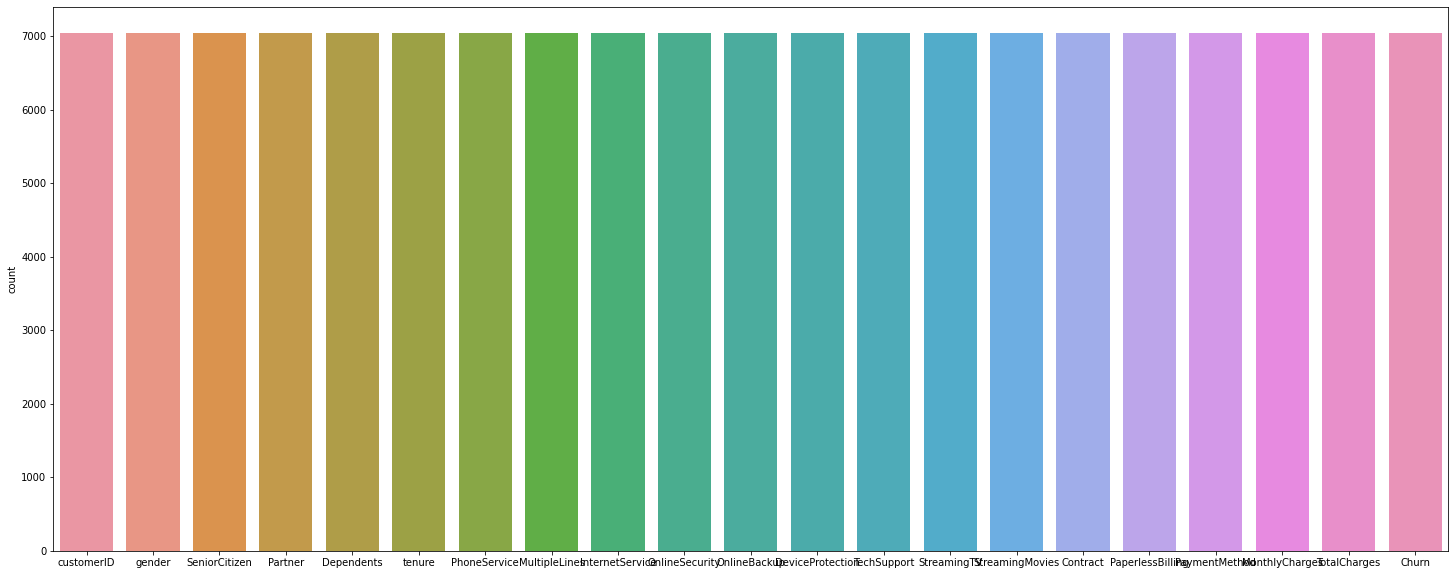

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data=TCC)

In [ ]:
categorical_features = TCC.select_dtypes(include = "object").columns
numerical_features = TCC.select_dtypes(include = "int64").columns
TCCFLT=TCC.select_dtypes(include="float").columns
TCCFLT

Index([], dtype='object')

SPLITING THE DATA

In [ ]:
X=TCC.drop(['customerID','Churn'],axis=1)
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:
Y=TCC['Churn']
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


STANDARDIZING THE DATA

In [ ]:
Scaler=StandardScaler()

In [ ]:
Scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=Scaler.transform(X)
print(standardized_data)

[[-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.13176632
  -0.39860759]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.38773977
  -0.94876238]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.51731743
  -1.64188328]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.14221613
  -0.13968008]
 [ 0.99053183  2.27315869  1.03453023 ...  1.33486261  0.23297901
  -0.31653445]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.47405205  1.4723266
   1.13801338]]


In [ ]:
X=standardized_data

TRAINING THE DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train)
print(Y_train)

[[-1.00955867 -0.43991649 -0.96662231 ...  0.39855772  1.29885974
  -1.27917296]
 [-1.00955867 -0.43991649 -0.96662231 ...  0.39855772 -0.21218295
  -0.8105618 ]
 [ 0.99053183 -0.43991649  1.03453023 ... -1.47405205 -0.25398219
   0.32787207]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772  0.72830005
  -1.18862775]
 [ 0.99053183 -0.43991649  1.03453023 ... -0.53774716 -0.52567728
   0.00222703]
 [-1.00955867 -0.43991649 -0.96662231 ... -1.47405205 -1.39928149
   0.93839033]]
4169    1
3571    0
1352    0
1278    0
938     0
       ..
6443    0
3606    0
5704    0
6637    0
2575    0
Name: Churn, Length: 5634, dtype: int64


CORRELATION AND HEAT MAP

In [ ]:
correlation=TCC.corr()
print(correlation)

                  customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.02139

<Axes: >

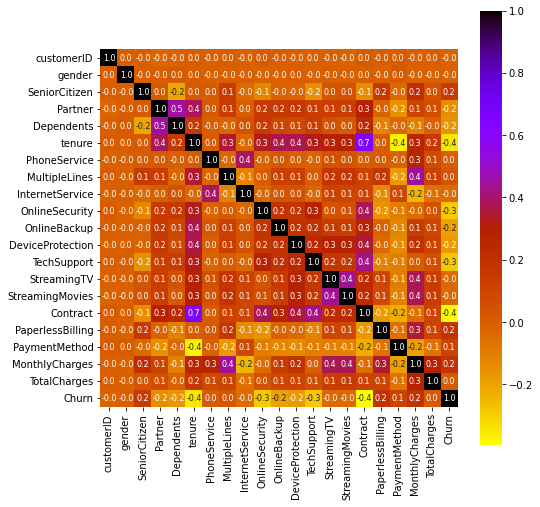

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,cmap="gnuplot_r",annot=True,annot_kws={'size':8},fmt='.1f')

MODEL PREDICTION AND ACCURACY

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
print('accuracy of linear regression on training data:{:2f}'.format(linreg.score(X_train,Y_train)))
print('accuracy of linear regression on test data:{:2f}'.format(linreg.score(X_test,Y_test)))

accuracy of linear regression on training data:0.272115
accuracy of linear regression on test data:0.248795


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
print('accuracy of logistic regression on training set:{:2f}'.format(logreg.score(X_train,Y_train)))
print('accuracy of logistic regression on test set:{:2f}'.format(logreg.score(X_test,Y_test)))

accuracy of logistic regression on training set:0.805289
accuracy of logistic regression on test set:0.806955


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,Y_train)
print('accuracy of decision tree classifier on training set:{:2f}'.format(clf.score(X_train,Y_train)))
print('accuracy of decision tree classifier on test set:{:2f}'.format(clf.score(X_test,Y_test)))

accuracy of decision tree classifier on training set:0.997870
accuracy of decision tree classifier on test set:0.725337


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
print('accuracy of K-NN Classifier on training set:{:2f}'.format(knn.score(X_train,Y_train)))
print('accuracy of K-NN Classifier on test set:{:2f}'.format(knn.score(X_test,Y_test)))

accuracy of K-NN Classifier on training set:0.824104
accuracy of K-NN Classifier on test set:0.767211


In [ ]:
sx  `    z                 `

['/bin/bash: z: command not found']

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
print('accuracy of GNB classifier on training set:{:2f}'.format(gnb.score(X_train,Y_train)))
print('accuracy of GNB classifier on test set:{:2f}'.format(gnb.score(X_test,Y_test)))

accuracy of GNB classifier on training set:0.757188
accuracy of GNB classifier on test set:0.752307


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)
print('accuracy of SVM classifier on training set:{:2f}'.format(svm.score(X_train,Y_train)))
print('accuracy of SVM classifier on test set:{:2f}'.format(svm.score(X_test,Y_test)))

accuracy of SVM classifier on training set:0.822329
accuracy of SVM classifier on test set:0.810504


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[0.167  0.2    0.03   ... 0.6025 0.03   0.09  ]


In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.2348267770918343


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(X_train,Y_train)
print('accuracy of GradientBooster on training set:{:2f}'.format(gradient_booster.score(X_train,Y_train)))
print('accuracy of GradientBooster on test set:{:2f}'.format(gradient_booster.score(X_test,Y_test)))

accuracy of GradientBooster on training set:0.824991
accuracy of GradientBooster on test set:0.813343


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X,Y)
print('accuracy of ExtraTreeclassifier on training set:{:2f}'.format(extra_tree_forest.score(X_train,Y_train)))
print('accuracy of ExtraTreeclassifier on test set:{:2f}'.format(extra_tree_forest.score(X_test,Y_test)))

accuracy of ExtraTreeclassifier on training set:0.997338
accuracy of ExtraTreeclassifier on test set:0.997871


PREDICTION ON THE BASIS OF EXTRA TREE CLASSIFIER

In [ ]:
input_data=(0,0,0,0,34,0,0,0,2,0,2,0,0,0,1,0,3,499,1467)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=extra_tree_forest.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
   print('POSITIVE CHURN')
else:
  print('NEGATIVE CHURN')

[0]
POSITIVE CHURN


**PREDICTION ON CUSTOMER CHURN IS POSITIVE**

GRAPH ON KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X=TCC.iloc[:,[1,2]].values
print(X)

[[0 0]
 [1 0]
 [1 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


In [ ]:
wcss=[]

for i in range(1,5):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


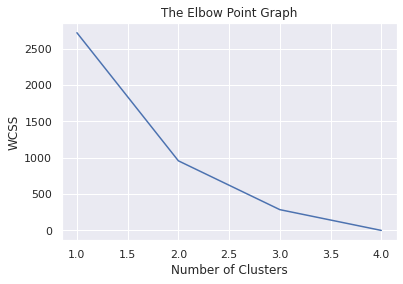

In [ ]:
sns.set()
plt.plot(range(1,5),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 0 2 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
